# Aufgabe 1

### a)

In [2]:
import math
import matplotlib.pyplot as plt

Solution: -22003436812.821262


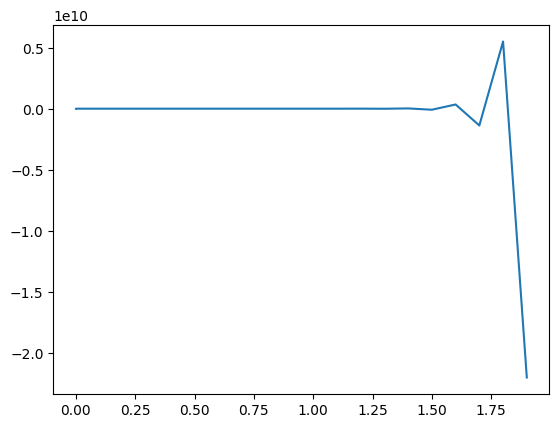

In [11]:
t = 0
y = 0
t_end = 2
h = 1/10
def f(t,y):
    return -50*y + math.cos(t)
ts = [0]
ys = [0]
while t < t_end:
    y = y + h*f(t,y)
    ts.append(t)
    ys.append(y)
    t += h
plt.plot(ts, ys)
print(f'Solution: {y}')

Ich zweifle stark an der Richtigkeit dieser Lösung. Vemutlich ist die Schrittweite zu groß gewählt, wodurch der Fehler sehr groß wird. Bereits h=1/100 schafft Abhilfe.
### b)

In [20]:
import math
import matplotlib.pyplot as plt

Lösung: -0.007771456369007459


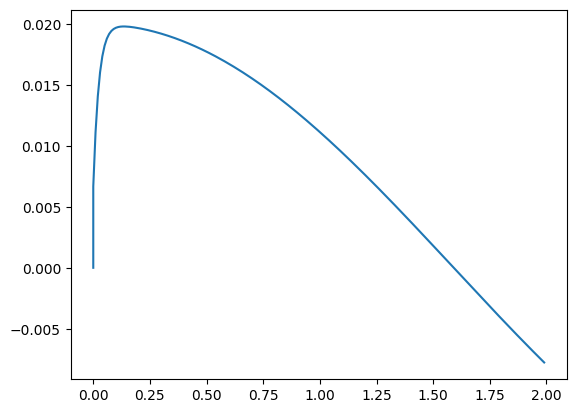

In [33]:
t = 0
y = 0
t_end = 2
h = 1/10
def f(t,y):
    return -50*y + math.cos(t)
ts = [0]
ys = [0]

def picard(t,y):
    u = y + h*f(t,y) # Ein Schritt vom expliziten Euler als Startwert für die Picard-Iteration
    for i in range(20): # 20 ist hier aus dem Bauch heraus gewählt, um kein Konvergenzkriterium implementieren zu müssen
        u = y + h*f(t,u)
    return u

while t < t_end:
    y = picard(t,y)
    ts.append(t)
    ys.append(y)
    t += h
plt.plot(ts, ys)
print(f'Lösung: {y}')

Das Ergebnis ist ebenso schlecht wie das von a). Verringern von h auf 1/100 bringt aber auch hier eine sinnvollere Lösung hervor.

### c)

Das nichtlineare Gleichungssystem für $u_{n+1}$:
$$
u_{n+1} = u_n + h(-50u_{n+1} + \text{cos}(t_{n+1}))
$$
Umgeformt:
$$
0 = u_n + h(-50u_{n+1} + \text{cos}(t_{n+1})) - u_{n+1}
$$
Wir nennen im folgenden das gesuchte $u_{n+1}$ $z$ und die rechte Seite der oberen Gleichung $F(z)$.

Die Newton-Iteration hat das folgende Schema:
$$
x_{k+1} = x_k - \frac{F(x_k)}{F'(x_k)}
$$

In unserem Fall:
$$
z_{n+1} = z_n - \frac{F(z_n)}{F'(z_n)}
$$
wobei gilt:
$$
F(z) = u_n + h(-50z + \text{cos}(t_{n+1})) - z \\
F'(z) = -50h - 1
$$

In [5]:
import math
import matplotlib.pyplot as plt

Lösung: -0.006079782935004921


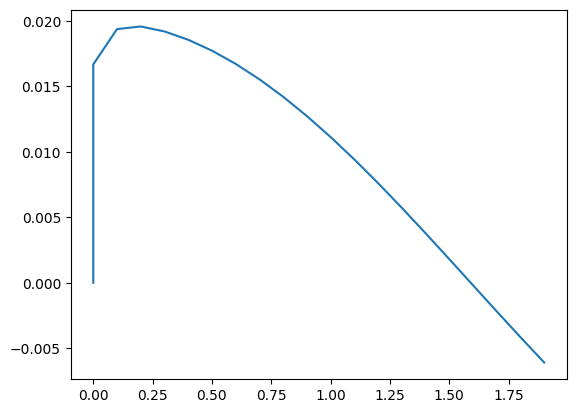

In [34]:
t = 0
y = 0
t_end = 2
h = 1/10
def f(t,y):
    return -50*y + math.cos(t)
ts = [0]
ys = [0]

def F(u, t, z):
    return u + h*(-50*z + math.cos(t)) - z
dF = -50*h - 1

def Newton(t, y):
    z = y + h*f(t,y) # Ein Schritt vom expliziten Euler als Startwert für das Newton-Verfahren
    for i in range(20): # Wieder willkürlich gewählt
        z = z - (F(y, t, z) / dF)
    return z
        
while t < t_end:
    y = Newton(t, y)
    ts.append(t)
    ys.append(y)
    t += h
plt.plot(ts, ys)
print(f'Lösung: {y}')

Ja! Ein Ergebnis ohne astronomischen Fehler, bereits bei h=1/10.

# Aufgabe 2

### a)

Lösung: (0.4556592869003423, 4.457236401130468) in 400000.0 Schritten.


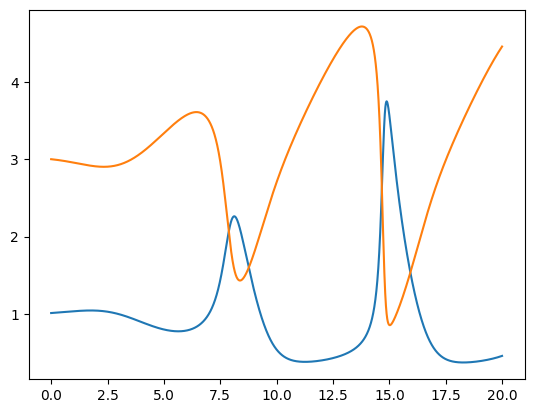

In [49]:
def f1(t, y1, y2):
    return 1 + y1*y1*y2 - 4*y1
def f2(t, y1, y2):
    return 3*y1 - y1*y1*y2

m = 4
alpha = [0, 0.5, 0.5, 1]
gamma = [1/6, 1/3, 1/3, 1/6]
beta = [[0,     0, 0, 0],
        [0.5,   0, 0, 0],
        [0,   0.5, 0, 0],
        [0,     0, 1, 0]]

h = 5e-5
t_end = 20
t = 0
y1 = 1.01
y2 = 3
ts = [0]
ys = [(y1,y2)]

while t < t_end:
    k1 = [] # Zwei ks wegen zwei fs
    k2 = []
    for j in range(m):
        sum_beta_k1 = sum(beta[j][l]*k1[l] for l in range(m) if l<j)
        sum_beta_k2 = sum(beta[j][l]*k2[l] for l in range(m) if l<j)
        k1.append(f1(t + alpha[j]*h, y1 + h*sum_beta_k1, y2 + h*sum_beta_k1))
        k2.append(f2(t + alpha[j]*h, y1 + h*sum_beta_k2, y2 + h*sum_beta_k2))
    y1 = y1 + h*sum([gamma[l]*k1[l] for l in range(m)])
    y2 = y2 + h*sum([gamma[l]*k2[l] for l in range(m)])
    ts.append(t)
    ys.append((y1,y2))
    t += h
plt.plot(ts,ys)
print(f'Lösung: ({y1}, {y2}) in {20/h} Schritten.')

### b)

Lösung: (0.45580684663951987, 4.457839441793768) in 23470950 Schritten mit je 3 Funktionsauswertungen; also 70412850 Funktionsauswertungen insgesamt. 
Kleinstes h: 1.52587890625e-07. 
Größtes h: 0.0003125


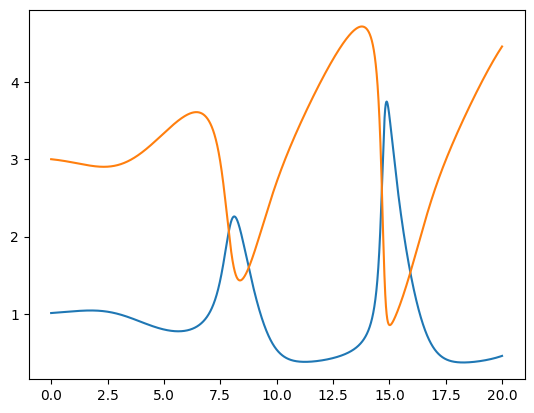

In [6]:
def f1(t, y1, y2):
    return 1 + y1*y1*y2 - 4*y1
def f2(t, y1, y2):
    return 3*y1 - y1*y1*y2

m = 4
alpha = [0, 0.5, 0.5, 1]
gamma = [1/6, 1/3, 1/3, 1/6]
beta = [[0,     0, 0, 0],
        [0.5,   0, 0, 0],
        [0,   0.5, 0, 0],
        [0,     0, 1, 0]]

h = 1e-2
t_end = 20
t = 0
y1 = 1.01
y2 = 3
ts = [0]
ys = [(1.01,3)]

h_min = 1e-7
h_max = 0.2
e_local = 1e-12

def step(t,y1,y2,h):
    k1 = [] # Zwei ks wegen zwei fs
    k2 = []
    for j in range(m):
        sum_beta_k1 = sum(beta[j][l]*k1[l] for l in range(m) if l<j)
        sum_beta_k2 = sum(beta[j][l]*k2[l] for l in range(m) if l<j)
        k1.append(f1(t + alpha[j]*h, y1 + h*sum_beta_k1, y2 + h*sum_beta_k1))
        k2.append(f2(t + alpha[j]*h, y1 + h*sum_beta_k2, y2 + h*sum_beta_k2))
    y1 = y1 + h*sum([gamma[l]*k1[l] for l in range(m)])
    y2 = y2 + h*sum([gamma[l]*k2[l] for l in range(m)])
    return y1, y2

def l2(a,b):
    return math.sqrt(a*a + b*b)

smallest_h = h_max
largest_h = h_min
while t < t_end:
    y1_1, y2_1 = step(t, y1, y2, h) # Ein Schritt mit h
    y1_temp, y2_temp = step(t, y1, y2, h/2)
    y1_2, y2_2 = step(t+(h/2), y1_temp, y2_temp, h/2) # Ein Doppelschritt mit h/2
    e_estimate = l2(y1_1 - y1_2, y2_1 - y2_2) # Schätzung für den lokalen Fehler in diesem Schritt
    if e_estimate > e_local: # Fehler ist zu groß, h wird verkleinert und Schritt wiederholt
        if h/2 >= h_min:
            h = h/2
            if h < smallest_h:
                smallest_h = h
        else: # Außer wir dürfen h nicht mehr verkleinern, dann machen wir den Schritt einfach trotzdem
            y1 = y1_2
            y2 = y2_2
            ts.append(t)
            ys.append((y1,y2))
            t += h
    elif e_estimate < (e_local/10): # Fehler ist zu klein, h wird vergrößert
        y1 = y1_2 # Schritt wird übernommen
        y2 = y2_2
        ts.append(t)
        ys.append((y1,y2))
        t += h
        if h*2 <= h_max:
            h = h*2
            if h > largest_h:
                largest_h = h
    else: # Wenn der lokale Fehler gut so ist, bleibt h gleich
        y1 = y1_2
        y2 = y2_2
        ts.append(t)
        ys.append((y1,y2))
        t += h
plt.plot(ts,ys) 
print(f'Lösung: ({y1}, {y2}) in {len(ts)} Schritten mit je 3 Funktionsauswertungen; also {len(ts)*3} Funktionsauswertungen insgesamt. \nKleinstes h: {smallest_h}. \nGrößtes h: {largest_h}')

### c)

Lösung: (0.445310846771659, 4.413471071849261) in 4573 Schritten. 
Kleinstes h: 0.000625. 
Größtes h: 0.04


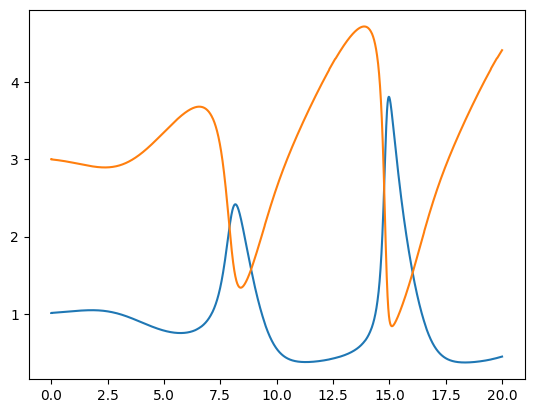

In [54]:
def f1(t, y1, y2):
    return 1 + y1*y1*y2 - 4*y1
def f2(t, y1, y2):
    return 3*y1 - y1*y1*y2

m = 7
alpha = [0, 1/5, 3/10, 4/5, 8/9, 1, 1]
gamma_low = [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0]
gamma_high = [5179/57600, 0, 7571/16695, 393/640, -92097/339200, 187/2100, 1/40]
beta = [[0, 0, 0, 0, 0, 0, 0],
        [1/5, 0, 0, 0, 0, 0, 0],
        [3/40, 9/40, 0, 0, 0, 0, 0],
        [44/45, -56/15, 32/9, 0, 0, 0, 0],
        [19372/6561, -25360/2187, 64448/6561, -212/729, 0, 0, 0],
        [9017/3168, -355/33, 46732/5247, 49/176, -5103/18656, 0, 0],
        [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0]]

h = 1e-2
t_end = 20
t = 0
y1 = 1.01
y2 = 3
ts = [0]
ys = [(1.01,3)]

h_min = 1e-7
h_max = 0.2
e_local = 1e-12

def step(t,y1,y2,h):
    k1 = [] # Zwei ks wegen zwei fs
    k2 = []
    for j in range(m):
        sum_beta_k1 = sum(beta[j][l]*k1[l] for l in range(m) if l<j)
        sum_beta_k2 = sum(beta[j][l]*k2[l] for l in range(m) if l<j)
        k1.append(f1(t + alpha[j]*h, y1 + h*sum_beta_k1, y2 + h*sum_beta_k1))
        k2.append(f2(t + alpha[j]*h, y1 + h*sum_beta_k2, y2 + h*sum_beta_k2))
    y1_low = y1 + h*sum([gamma_low[l]*k1[l] for l in range(m)])
    y2_low = y2 + h*sum([gamma_low[l]*k2[l] for l in range(m)])
    y1_high = y1 + h*sum([gamma_high[l]*k1[l] for l in range(m)])
    y2_high = y2 + h*sum([gamma_high[l]*k2[l] for l in range(m)])
    return y1_low, y2_low, y1_high, y2_high

def l2(a,b):
    return math.sqrt(a*a + b*b)

smallest_h = h_max
largest_h = h_min
while t < t_end:
    y1_low, y2_low, y1_high, y2_high = step(t, y1, y2, h)
    e_estimate = l2(y1_low - y1_high, y2_low - y2_high) # Schätzung für den lokalen Fehler in diesem Schritt
    if e_estimate > e_local: # Fehler ist zu groß, h wird verkleinert und Schritt wiederholt
        if h/2 >= h_min:
            h = h/2
            if h < smallest_h:
                smallest_h = h
        else: # Außer wir dürfen h nicht mehr verkleinern, dann machen wir den Schritt einfach trotzdem
            y1 = y1_low
            y2 = y2_low
            ts.append(t)
            ys.append((y1,y2))
            t += h
    elif e_estimate < (e_local/10): # Fehler ist zu klein, h wird vergrößert
        y1 = y1_high # Schritt wird übernommen
        y2 = y2_high
        ts.append(t)
        ys.append((y1,y2))
        t += h
        if h*2 <= h_max:
            h = h*2
            if h > largest_h:
                largest_h = h
    else: # Wenn der lokale Fehler gut so ist, bleibt h gleich
        y1 = y1_high
        y2 = y2_high
        ts.append(t)
        ys.append((y1,y2))
        t += h
plt.plot(ts,ys)
print(f'Lösung: ({y1}, {y2}) in {len(ts)} Schritten. \nKleinstes h: {smallest_h}. \nGrößtes h: {largest_h}')